In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# For RF 

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Helper Function
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# fix random seed for reproducibility
np.random.seed(42)

In [0]:
# load the dataset
dataframe = pd.read_csv('final.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
len(dataset)

17520

In [0]:
# The complete dataset has 17520 values. 
# Considering the last week for testing and the month before that for training

In [0]:
# there are 1440 values in 30 days (month)
# There are 336 values in 7 days (week)

# therefore total dataset required is 1440 + 336 = 1776 readings


dataset = dataset[len(dataset)-1776:]

In [9]:
len(dataset)

1776

In [0]:
# split into train and test sets
train_size = 1440
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
print("Length of Train: " + str(len(train)))
print("Length of Test: " + str(len(test)))

Length of Train: 1440
Length of Test: 336


In [0]:
# reshape into X=t and Y=t+1
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# check the Shape of TrainY and TestY
print("Shape of TrainY: " + str(trainY.shape))
print("Shape of TestY: " + str(testY.shape))

Shape of TrainY: (1391,)
Shape of TestY: (287,)


In [0]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,12),
        'n_estimators': (5, 10, 50, 500, 750),
    },
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=0, 
    n_jobs=-1)

In [0]:
grid_result = gsc.fit(trainX, trainY)
best_params = grid_result.best_params_

In [18]:
grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [19]:
best_params

{'max_depth': 11, 'n_estimators': 750}

In [0]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"], 
                            random_state=False, 
                            verbose=False)

In [0]:
# Optional
scores = cross_val_score(rfr, trainX, trainY, cv=10, scoring='neg_mean_absolute_error')

In [22]:
scores

array([ -84.4757835 ,  -65.83898223,  -70.12296616,  -72.37662964,
        -62.87665239,  -79.58929557,  -70.05515234,  -60.52735446,
       -119.3173577 ,  -90.6266791 ])

In [0]:
predictions = cross_val_predict(rfr, testX, testY, cv=10)

In [24]:
predictions[:10]

array([3877.42346558, 3637.03144896, 3093.71414421, 2873.88131348,
       2588.42211426, 2329.33427848, 2189.96585872, 2135.46179281,
       2125.4439221 , 2084.38667649])

In [0]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mape_rfr = mean_absolute_percentage_error(testY, predictions)

In [27]:
mape_rfr

2.882158514058046

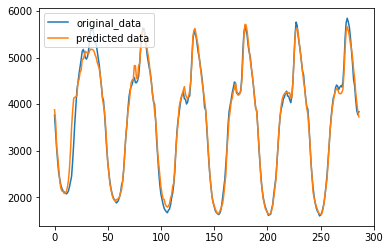

In [28]:
plt.plot(testY, label = 'original_data')
plt.plot(predictions, label = 'predicted data')
plt.legend()
plt.show()